In [1]:
#Operating system
from pathlib import Path

#Topic Modelling
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
from gensim import models
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#Data processing
import pandas as pd

#Data visulisation
import matplotlib.pyplot as plt
import seaborn as sns

#Word cloud
from wordcloud import WordCloud

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

##Interactive topic model visualization
import pyLDAvis
import pyLDAvis.gensim_models

In [2]:
#Import data
speech_df = pd.read_csv(Path.cwd() /"clean_speeches_df.txt")
data_text = speech_df['content_nouns']

In [3]:
#Create a list
speeches=[]
for word in data_text:
    speech = word[:-1]
    speeches.append(speech)

In [4]:
#Function of tokenizing
def tokenize(words):
    tokens_list = []
    for word in words:
        new = simple_preprocess(word, deacc = True)
        tokens_list.append(new)
    return tokens_list

In [5]:
#Tokenize speeches
toke_speech = tokenize(speeches)

In [6]:
#Create a dicionary
dictionary = gensim.corpora.Dictionary(toke_speech)

In [7]:
#Cleans this dictionary(appear less tha 50% but more than 2 different speeches)
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=1000)

In [8]:
#Create a corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in toke_speech]

In [9]:
#Function of building LDA model
def lda_model(number):
    lda = gensim.models.LdaModel(corpus = bow_corpus, id2word = dictionary, num_topics = number, 
                   random_state = 100, update_every = 1, chunksize = 100, passes = 10, per_word_topics = True)
    return lda

#Function of calculating coherence scores by using c_v measure
def coherence_values(model):
    coherence = CoherenceModel(model = model, texts = toke_speech, dictionary = dictionary, 
                                        coherence = 'u_mass')
    return coherence

def c_trial(lower_limit,upper_limit):
    coherence_values_list = []
    for number in range(lower_limit,upper_limit):
        model = lda_model(number)
        coherence = coherence_values(model)
        coherence_values_list.append(coherence.get_coherence())
    return coherence_values_list

In [10]:
#Calculate corresponding coherence scores when the value of k ranges from 1 to 15
coherence_scores = c_trial(1, 15)

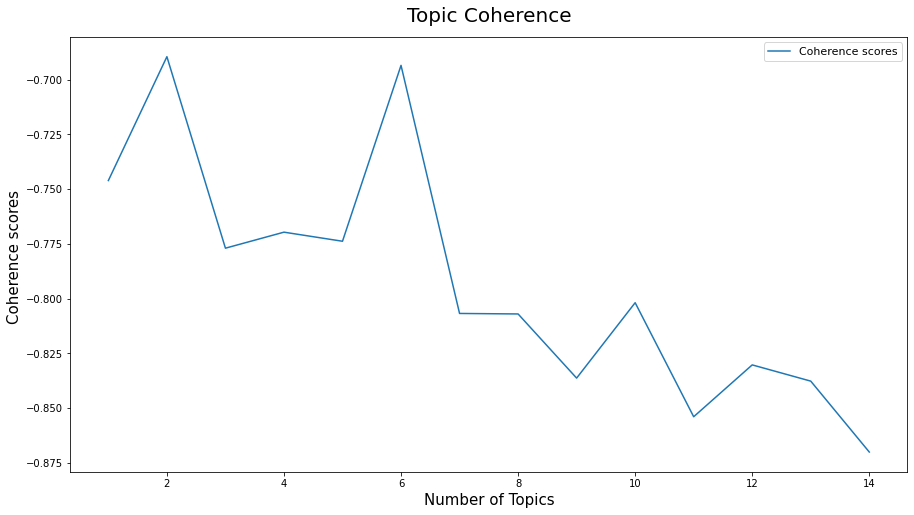

In [11]:
#Plot coherence scores
plt.rcParams['figure.figsize'] = [15, 8]
x = range(1,15)
plt.plot(x, coherence_scores, label = "Coherence scores")
plt.xlabel("Number of Topics", fontsize = 15)
plt.ylabel("Coherence scores ", fontsize = 15)
plt.legend(loc = "upper right", fontsize = 11)
plt.title('Topic Coherence', fontsize = 20, pad = 15)
plt.show()

In [12]:
#Builde the LDA Model with k value equal to 6
k_value = 6
topic_model_lda = lda_model(k_value)

In [13]:
#Print topics of the model
for idx, topic in topic_model_lda.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.032*"region" + 0.020*"asia" + 0.017*"democracy" + 0.013*"rule" + 0.013*"development" + 0.013*"energy" + 0.013*"conflict" + 0.013*"society" + 0.012*"trade" + 0.011*"china"
Topic: 1 
Words: 0.025*"insurance" + 0.017*"folk" + 0.013*"gun" + 0.012*"vote" + 0.011*"bill" + 0.011*"court" + 0.010*"reform" + 0.009*"party" + 0.009*"deal" + 0.009*"term"
Topic: 2 
Words: 0.013*"peace" + 0.009*"freedom" + 0.009*"bless" + 0.009*"story" + 0.009*"god" + 0.008*"veteran" + 0.008*"service" + 0.007*"man" + 0.007*"justice" + 0.007*"israel"
Topic: 3 
Words: 0.016*"democracy" + 0.013*"education" + 0.012*"somebody" + 0.012*"chance" + 0.011*"student" + 0.010*"university" + 0.010*"society" + 0.010*"school" + 0.010*"feel" + 0.009*"group"
Topic: 4 
Words: 0.018*"iran" + 0.015*"threat" + 0.012*"intelligence" + 0.012*"attack" + 0.011*"decision" + 0.010*"information" + 0.010*"russia" + 0.010*"isil" + 0.009*"sanction" + 0.009*"weapon"
Topic: 5 
Words: 0.028*"tax" + 0.021*"company" + 0.018*"energy" +

In [14]:
#Topic visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(topic_model_lda,bow_corpus,dictionary=dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.045283 -0.155961       1        1  24.767175
5      0.124645  0.131668       2        1  20.333933
4     -0.087467 -0.144752       3        1  18.130201
1      0.160362  0.000556       4        1  16.396783
0     -0.196713  0.095153       5        1  10.826512
3     -0.046111  0.073336       6        1   9.545396, topic_info=          Term        Freq       Total Category  logprob  loglift
336     region  697.000000  697.000000  Default  30.0000  30.0000
111        tax  959.000000  959.000000  Default  29.0000  29.0000
399  insurance  781.000000  781.000000  Default  28.0000  28.0000
40      energy  746.000000  746.000000  Default  27.0000  27.0000
710  democracy  613.000000  613.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
113       term  103.663940  567.795536   Topic6  -4.9080   0.6485
316       hope   83.054847  328.417357   Topic6  -5.1296   0.9743
172        man   85.902841  390.173668   Topic6  -5.0959   0.8357
69       money   86.244080  543.864748   Topic6  -5.0919   0.5076
484   politics   80.716221  391.703976   Topic6  -5.1582   0.7695

[353 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
2         1  0.014110  administration
2         2  0.324535  administration
2         3  0.418603  administration
2         4  0.174026  administration
2         5  0.007055  administration
...     ...       ...             ...
851       1  0.091618             yes
851       2  0.152697             yes
851       4  0.198506             yes
851       5  0.076348             yes
851       6  0.480995             yes

[1101 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 5, 2, 1, 4])

In [15]:
#Create data frame of topics with corresponding keywords
lda_topics = [[(term, round(weight, 3)) for term, weight in topic_model_lda.show_topic(n, topn = 20)] 
              for n in range(0, topic_model_lda.num_topics)]
lda_topics_df = pd.DataFrame([', '.join([term for term, weight in topic]) 
                              for topic in lda_topics], columns = ['keywords'],
                             index = ['topic_' + str(t) for t in range(1, topic_model_lda.num_topics + 1)] )

In [16]:
#Replace index with topic names
index_names = lda_topics_df.index.values.tolist()
topic_names = ['International Affairs','Insurance','American Values','Education','Military','Tax and Energy']
lda_topics_df = lda_topics_df.rename(index = dict(zip(index_names, topic_names)))

In [17]:
#Print the dataframe
lda_topics_df

,keywords
International Affairs,"region, asia, democracy, rule, development, en..."
Insurance,"insurance, folk, gun, vote, bill, court, refor..."
American Values,"peace, freedom, bless, story, god, veteran, se..."
Education,"democracy, education, somebody, chance, studen..."
Military,"iran, threat, intelligence, attack, decision, ..."
Tax and Energy,"tax, company, energy, deficit, cut, governor, ..."


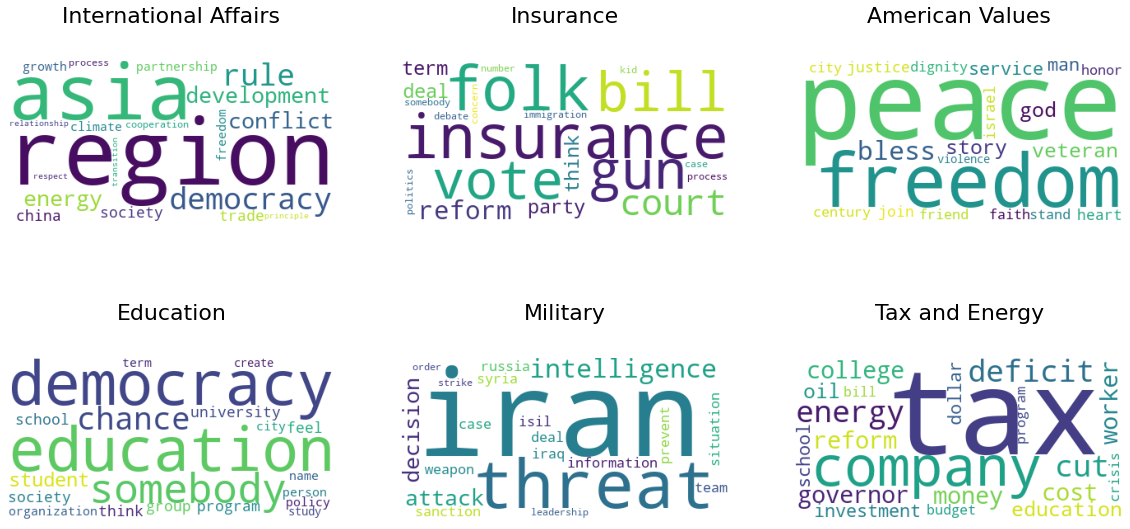

In [18]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#Settings of plot
wc = WordCloud(background_color = "white", max_font_size = 145, random_state = 40)
plt.rcParams['figure.figsize'] = [20, 10]

#Create word cloud for each topic
for i in range(topic_model_lda.num_topics):
    wc.generate(text = lda_topics_df["keywords"][i])
    plt.subplot(2, 3, i + 1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(lda_topics_df.index[i], fontsize = 22, y = 1.2)

In [19]:
#Extract topic proportion of topics by speech
topic_proportion_speeches = [topic_model_lda.get_document_topics(item, minimum_probability = 0.0) for item in bow_corpus]
            
# create data frame of Topic proportions by speech
lda_df_proportions = pd.DataFrame.from_records([{v: k for v, k in row} for row in topic_proportion_speeches])
lda_df_proportions.columns = topic_names

In [20]:
#Print the dataframe to check
lda_df_proportions

,International Affairs,Insurance,American Values,Education,Military,Tax and Energy
0,0.000761,0.000761,0.000761,0.000763,0.000759,0.996195
1,0.001597,0.001597,0.853055,0.001601,0.140560,0.001590
2,0.002334,0.002327,0.988349,0.002328,0.002335,0.002327
3,0.001598,0.001593,0.992010,0.001598,0.001608,0.001593
4,0.001154,0.001152,0.284570,0.001150,0.710823,0.001151
...,...,...,...,...,...,...
400,0.037151,0.000259,0.000259,0.961812,0.000259,0.000259
401,0.000244,0.000244,0.000244,0.978082,0.020943,0.000244
402,0.547816,0.000283,0.000283,0.365571,0.085765,0.000283
403,0.447778,0.000220,0.000220,0.551340,0.000220,0.000221


In [21]:
#Write the data frame to a txt file named "topic_proportion_df.txt"
lda_df_proportions.to_csv(Path.cwd()/"topic_proportion_df.txt", header= True, index= False) 